# Imaginary part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random

In [2]:
def sciPrintR(val, relErr, name=None):
    if name != None:
        print name, val, "+-", val * relErr, "(", relErr * 100., "%)"
    else:
        print val, "+-", val * relErr, "(", relErr * 100., "%)"
        
def sciPrintD(val, dErr, name=None):
    if name != None:
        print name, val, "+-", dErr, "(", (dErr/val) * 100., "%)"
    else:
        print val, "+-", dErr, "(", (dErr/val) * 100., "%)"
        
def prodErrorR(errors):
    errors = np.array(errors)
    return np.sqrt((errors**2).sum())


print(math.sqrt(0.1*0.1  + 0.6*0.6 + 0.4*0.4))
prodErrorR([0.1,0.6,0.4])


0.728010988928


0.72801098892805183

In [3]:
ATrot = np.array([1* 60 + 17.50, 1*60 + 17.12, 60 + 16.18, 60 +16.94, 60 + 17.57, 60+ 17.59, 60 + 17.53, 60 + 18.06])
ATcyl = np.array([60 +37.60, 60 +38.07, 60 +37.13, 60 + 37.54, 60 + 37.62, 60 + 36.84, 60 +37.40, 60 + 37.38, 60 +37.52])


mcyl = 1.6189
dmcyl = 0.0005

Rcyl = 0.0781/2. # ISU 
dRcyl = 0.0001

In [4]:

ATrot = ATrot / 10.
ATcyl = ATcyl / 10.

Trot = ATrot.mean()
Tcyl = ATcyl.mean()

dTrot = ATrot.std(ddof=1.) / math.sqrt(ATrot.size)
dTcyl = ATcyl.std(ddof=1.) / math.sqrt(ATcyl.size)
sciPrintD(Tcyl, dTcyl)
sciPrintR(Trot, dTrot)

9.74555555556 +- 0.0113677310244 ( 0.11664528471 %)
7.731125 +- 0.154722126937 ( 2.00128864735 %)


In [5]:
g = 9.814

In [6]:
Icyl = (mcyl *(Rcyl*Rcyl)/2.)
EIcyl = prodErrorR([dmcyl/mcyl, dRcyl / Rcyl, dRcyl / Rcyl])
sciPrintR(Icyl*1e6, EIcyl, name="Icyl*1e6 =")

I0 = (Trot/Tcyl)**2 * Icyl

EI0 = prodErrorR([EIcyl, dTrot/Trot, dTrot/Trot, dTcyl/Tcyl, dTcyl/Tcyl])
sciPrintR(I0*1e6, EI0, name="I0*1e6 =")

Icyl*1e6 = 1234.33232862 +- 4.48641717245 ( 0.363469145902 %)
I0*1e6 = 776.791189432 +- 4.20717131568 ( 0.541609041519 %)


In [7]:
r = 121 / 1000.
dr = 1 / 1000.

k = g * r / (2. * math.pi * I0)
Ek = prodErrorR([dr/r, EI0])

sciPrintR(k, Ek, name="System ratio = k = \n")

System ratio = k = 
243.302888296 +- 2.40409085847 ( 0.98810617305 %)


In [9]:
m = np.array([60., 76., 92., 116., 141., 173., 215., 270., 336.])
m /= 1000.
dm = 1. / 1000.

T_measured = [
    [194.52, 195.93, 211.24, 210.82],
    [160.05, 157.95, 157.08, 152.09],
    [131.52, 126.93, 133.47, 129.54],
    [104.16, 103.05, 106.92, 102.85],
    [84.84, 85.77, 83.84, 83.75],
    [67.5, 67.95, 73.16, 68.55],
    [54.75, 56.34, 55.83, 55.28],
    [44.82, 44.2, 43.01, 43.89],
    [35.82, 35.5, 35.73, 34.76]
]
    
    
T_measured_means = np.array([(np.array(A)).mean() for A in T_measured])

FREQ_ABS = 466.

print(np.array(T_measured))

print(1./m)

[[ 194.52  195.93  211.24  210.82]
 [ 160.05  157.95  157.08  152.09]
 [ 131.52  126.93  133.47  129.54]
 [ 104.16  103.05  106.92  102.85]
 [  84.84   85.77   83.84   83.75]
 [  67.5    67.95   73.16   68.55]
 [  54.75   56.34   55.83   55.28]
 [  44.82   44.2    43.01   43.89]
 [  35.82   35.5    35.73   34.76]]
[ 16.66666667  13.15789474  10.86956522   8.62068966   7.09219858
   5.78034682   4.65116279   3.7037037    2.97619048]


In [10]:
T = np.array(T_measured).mean(axis=1)
dT = (np.array(T_measured).std(axis=1,ddof=1) / math.sqrt(4))  # corr. dev / sqrt(n)
print("T = ")
for i in range(T.size):
    sciPrintD(T[i], dT[i])
    
Omega = (2. * math.pi)/ T
print("\n \\Omega *1e3 = ")    
for i in range(T.size):
    sciPrintR(Omega[i]*1e3, dT[i]/T[i])
    
W0 = m * T* k
EW0 = prodErrorR([dm/m, dT/T, Ek])


print("\n W0 = ")
for i in range(W0.size):
    sciPrintR(W0[i], EW0[i])
    
T0 = W0 / (2. * math.pi)
ET0 = EW0

print("\n Frequency = ")
for i in range(T0.size):
    sciPrintR(T0[i], ET0[i])
    
print "Frequency = " , T0
print "mean frequency = ", T0.mean()

T = 
203.1275 +- 4.57238335918 ( 2.25099179539 %)
156.7925 +- 1.68689248324 ( 1.07587574867 %)
130.365 +- 1.39806115746 ( 1.07242063242 %)
104.245 +- 0.937056561793 ( 0.898898327779 %)
84.55 +- 0.475797576006 ( 0.562741071563 %)
69.29 +- 1.30780350206 ( 1.88743469773 %)
55.55 +- 0.343438495221 ( 0.61825111651 %)
43.98 +- 0.376718285549 ( 0.856567270461 %)
35.4525 +- 0.240463961264 ( 0.678270816624 %)

 \Omega *1e3 = 
30.9322238849 +- 0.696281821781 ( 2.25099179539 %)
40.0732516363 +- 0.431138396059 ( 1.07587574867 %)
48.1968726819 +- 0.516873206825 ( 1.07242063242 %)
60.2732534623 +- 0.541795267471 ( 0.898898327779 %)
74.3132502328 +- 0.418191180673 ( 0.562741071563 %)
90.6795397197 +- 1.71151709642 ( 1.88743469773 %)
113.108646394 +- 0.6992954692 ( 0.61825111651 %)
142.864604529 +- 1.22373144347 ( 0.856567270461 %)
177.228271834 +- 1.20208764665 ( 0.678270816624 %)

 W0 = 
2965.29044654 +- 88.0701029553 ( 2.97003293751 %)
2899.2531766 +- 56.9993792039 ( 1.96600212992 %)
2918.07265501 

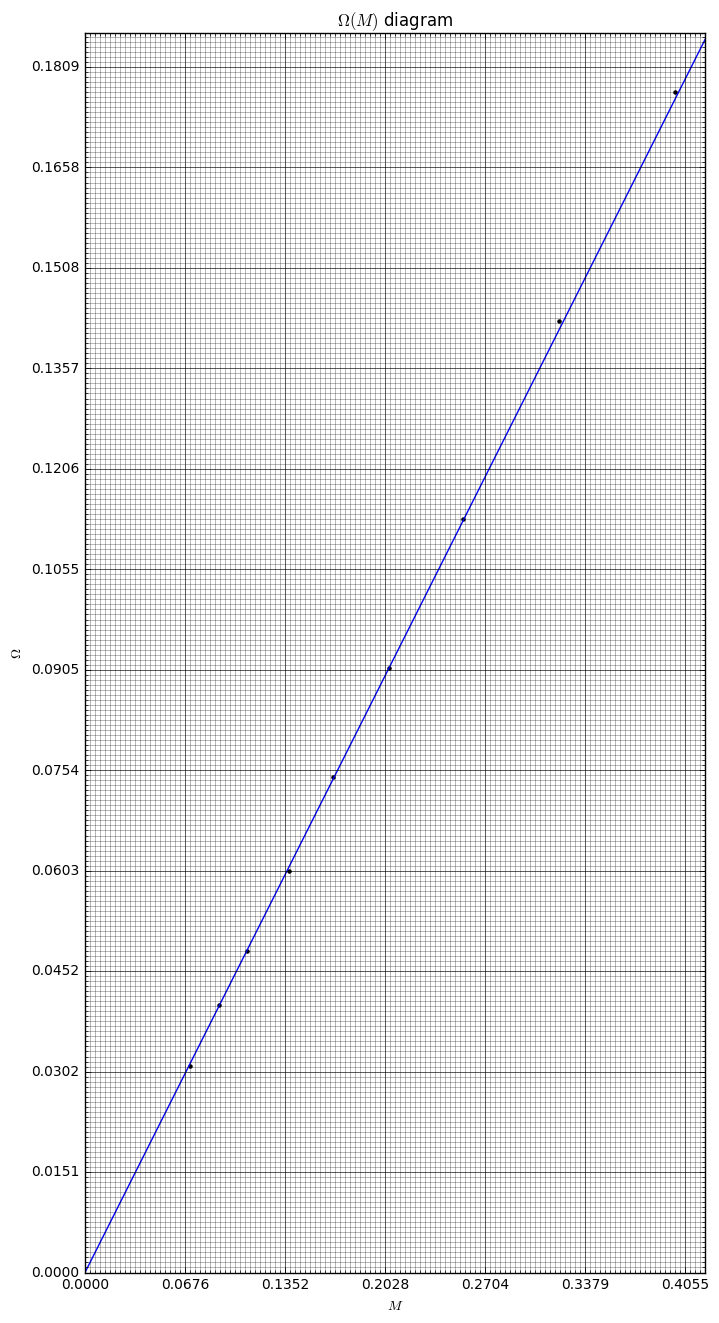

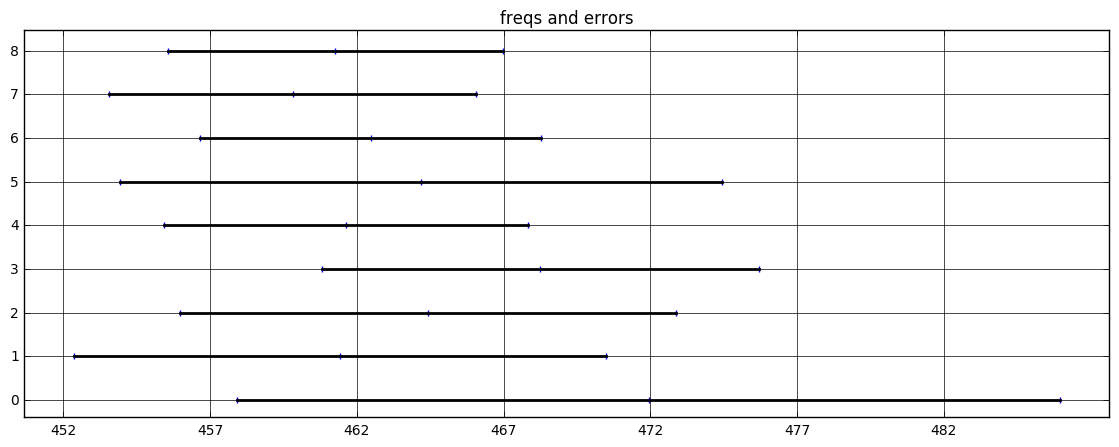

471.940632271 +- 14.016792224 ( 2.97003293751 %)
461.430474331 +- 9.07173295346 ( 1.96600212992 %)
464.425687347 +- 8.44682229253 ( 1.81876724795 %)
468.253054566 +- 7.44439143573 ( 1.58982229014 %)
461.636479932 +- 6.18665936222 ( 1.34015824814 %)
464.177473831 +- 10.2465404639 ( 2.20746180966 %)
462.476765937 +- 5.80389253238 ( 1.25495872655 %)
459.81844178 +- 6.24953233714 ( 1.35913042394 %)
461.268225559 +- 5.69620915665 ( 1.23490169949 %)


In [13]:
fig = plt.figure(figsize=(8, 16))
plt.title("$\\Omega(M)$ diagram")
M = m * g * r
ax = fig.add_subplot(111)
x_minor_ticks = np.linspace(0, M.max() * 1.05+ 0.0001, 125) # 104 
x_major_ticks = np.array([x_minor_ticks[i] for i in range(0, x_minor_ticks.size, 20)])
y_minor_ticks = np.linspace(0, Omega.max()* 1.05+ 0.0001, 248) # 4822
y_major_ticks = np.array([y_minor_ticks[i] for i in range(0, y_minor_ticks.size, 20)])


ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.4, linestyle='-')
ax.grid(which='major', alpha=0.7, linestyle='-')
ax.set_xlabel('$M$')
ax.set_ylabel('$\\Omega$')


plt.xlim((0, M.max() * 1.05))
plt.ylim((0, Omega.max() * 1.05))

grid = x_minor_ticks

plt.plot(grid, grid / (I0.mean() * W0.mean()))
plt.scatter(M, Omega, s=5, color="black")
plt.show()

fig = plt.figure(figsize=(14,5))
plt.title("freqs and errors")
plt.grid(which='major', axis='both', linestyle='-')
ax = fig.gca()
ax.set_yticks(np.arange(0, T0.size, 1))
ax.set_xticks(np.arange(int((T0-T0*ET0).min()), int((T0+T0*ET0).max()) + 1, 5.))
for i, (F, EF) in enumerate(zip(T0, ET0)):
    plt.plot([F - F*EF, F + F*EF], np.ones(2) * i, color="black", linewidth=2.)
    plt.scatter(F - F*EF, [i], marker='|')
    plt.scatter(F, [i], marker='+')
    plt.scatter(F + F*EF, [i], marker='|')
plt.show()

for F, EF in zip(T0, ET0):
    sciPrintR(F, EF)


In [14]:
x_cost = 0.4055/ 120
y_cost = 0.1809 / 240
pk = (246.* y_cost) / (124. * x_cost)
pk1 = (246.* y_cost) / ((124.-6.) * x_cost)
pk2 = ((246. - 8.)* y_cost) / (124. * x_cost)
print pk, pk1, pk2
dpk = (pk1 - pk2) / math.sqrt(9)
sciPrintD(pk, dpk, name="pk = ")
Epk = dpk/pk
wplot = 1/(pk * I0)
Ewplot = prodErrorR([Epk, EI0])
sciPrintR(wplot, Ewplot, name="wplot =")
sciPrintR(wplot / (2. * math.pi), Ewplot, name="freqplot =")

0.442518197367 0.465019122657 0.42812736168
pk =  0.442518197367 +- 0.0122972536589 ( 2.77892609435 %)
wplot = 2909.13968212 +- 82.363959057 ( 2.83121362523 %)
freqplot = 463.003960553 +- 13.1086312165 ( 2.83121362523 %)


In [15]:
angl = 10. # (grad)
mangl = 141. / 1000.
tAngl = np.array([5. * 60 + 32.18, 5. * 60. + 36.68])
ta = tAngl.mean() * (360. / angl)
print(tAngl.mean(), tAngl.mean() * 360. / angl, ta)

(334.43000000000001, 12039.48, 12039.48)


In [16]:
sciPrintR((2. * math.pi) / ta * 1e9, 1/ta, name="\OmegaTr * 1e9 = ")
Mtr = (2. * math.pi) / (pk*ta)
EMtr = prodErrorR([Epk, 0.2 / ta])
sciPrintR(Mtr*1e6, EMtr, name="Mtr*1e6 = ")

\OmegaTr * 1e9 =  521881.784527 +- 43.3475353194 ( 0.00830600657171 %)
Mtr*1e6 =  1179.34536395 +- 32.7731419169 ( 2.77892659087 %)


In [17]:
m*g*r

array([ 0.07124964,  0.09024954,  0.10924945,  0.1377493 ,  0.16743665,
        0.20543646,  0.25531121,  0.32062338,  0.39899798])